# Machine Learning Model for Credit Card Fraud Detection 

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# Data Analysis

In [2]:
cards = pd.read_csv('creditcard.csv')

In [3]:
cards.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
cards.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
cards.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<Axes: xlabel='Class', ylabel='count'>

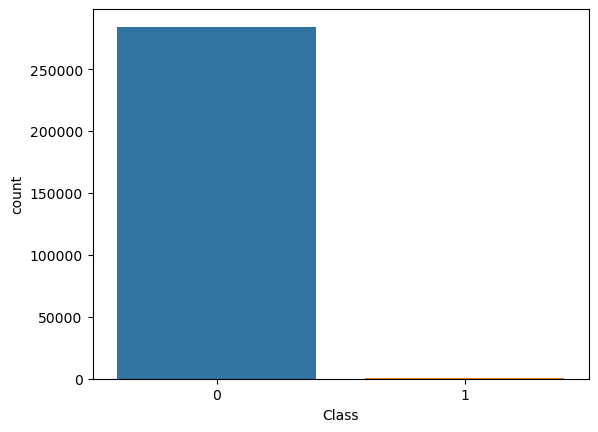

In [9]:
sns.countplot(data = cards , x = 'Class')

The above graph indicates that there is uneven distribution of data between legit transactions and fraud transactions

In [11]:
cards['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

There are 284315 legit transactions and 492 fraud transactions 

<Axes: xlabel='Class', ylabel='Amount'>

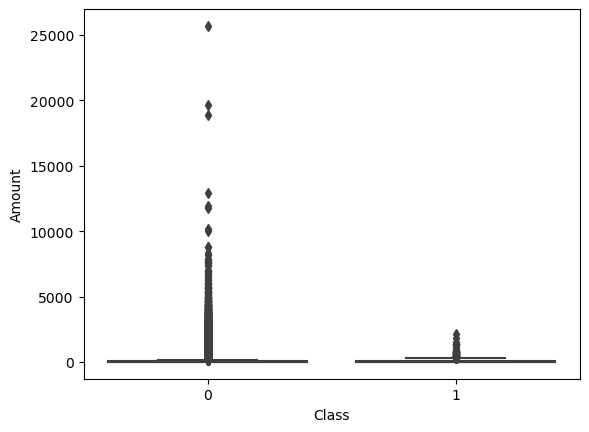

In [17]:
sns.boxplot(data = cards , y ='Amount' , x = 'Class')

In [18]:
cards.groupby('Class').mean()['Amount']

Class
0     88.291022
1    122.211321
Name: Amount, dtype: float64

The average amount for a legit transaction is 88 USD whereas the average amount for a fraud transaction is 122 USD

In [26]:
legit = cards[cards['Class']==0]
fraud = cards[cards['Class']==1]

Dividing Data based on whether the transaction is legit or fraud

In [27]:
legit.shape

(284315, 31)

In [29]:
fraud.shape

(492, 31)

In [30]:
legit_sample = legit.sample(n=492)

In [31]:
updated_cards = pd.concat([legit_sample , fraud] , axis=0)

In [40]:
updated_cards.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
178436,123623.0,1.930263,-0.070654,-1.345330,0.598174,0.057097,-0.635552,-0.104731,-0.091203,0.454921,...,-0.055623,-0.082296,0.122731,-0.412703,-0.200523,0.215941,-0.032500,-0.032722,39.95,0
240078,150420.0,-1.234466,0.330958,1.667590,-1.200141,0.206492,-0.014523,0.948398,-0.013636,-0.074513,...,-0.257240,-0.866630,-0.008457,0.661714,0.312394,0.232716,-0.140758,0.083369,121.00,0
268072,163045.0,-2.511433,0.749937,-1.515199,-0.425968,2.178308,3.705658,-1.178523,1.746908,-1.553842,...,-0.396309,-0.871736,-0.422075,0.485201,0.548025,-0.390181,-0.509096,0.234583,29.00,0
103593,68726.0,-2.305709,1.159357,2.033897,-2.600667,-1.180379,0.701839,-1.163138,-4.840060,-0.828749,...,4.179659,-2.046172,0.362143,0.259976,0.133464,0.683817,0.120081,-0.182308,81.95,0
97741,66363.0,1.428323,-0.220925,-0.182173,-0.662865,-0.516344,-1.359778,0.081730,-0.491842,-1.364876,...,0.212864,0.591205,-0.191311,0.474142,0.836921,-0.090934,-0.021929,0.006943,25.00,0


<Axes: xlabel='Class', ylabel='count'>

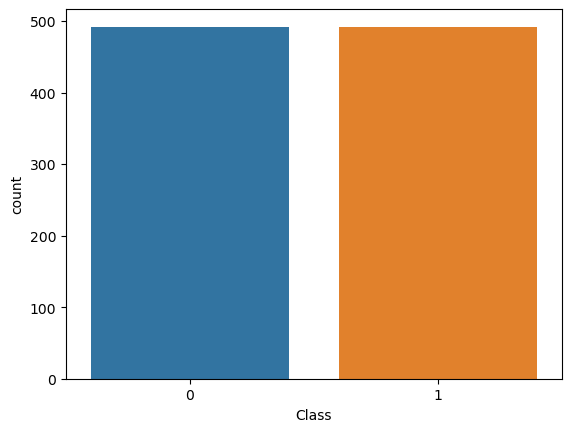

In [42]:
sns.countplot(data = updated_cards , x = 'Class')

In the updated_cards database the data is distributed evenly between legit and fraud transactions

In [44]:
updated_cards['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [48]:
updated_cards.groupby('Class').mean()['Amount']

Class
0     77.589248
1    122.211321
Name: Amount, dtype: float64

# Data Preprocessing

Performing Standardisation on Data

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
scaler.fit(updated_cards.drop('Class',axis=1))
scaled_features = scaler.transform(updated_cards.drop('Class',axis=1))
scaled_cards = pd.DataFrame(scaled_features,columns=updated_cards.columns[:-1])
scaled_cards.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.737194,0.783293,-0.479550,0.357144,-0.522677,0.361431,0.050914,0.464541,-0.085665,0.765929,...,-0.169059,-0.149153,-0.061873,0.098044,-0.674811,-0.338720,0.438424,-0.129318,-0.165665,-0.284452
1,1.298372,0.215889,-0.375548,0.843585,-1.081039,0.396034,0.391189,0.644278,-0.069703,0.536145,...,-0.116283,-0.221117,-0.728146,-0.009185,1.252761,0.408875,0.473830,-0.234032,0.113212,0.100114
2,1.562762,-0.013058,-0.267048,0.329718,-0.840664,0.852752,2.429554,0.281278,0.292584,-0.105911,...,-0.573562,-0.270756,-0.732484,-0.347262,0.936086,0.752316,-0.840892,-0.590309,0.476462,-0.336407
3,-0.412448,0.023826,-0.161024,0.902726,-1.515891,0.074803,0.783699,0.283904,-1.062890,0.208792,...,-1.370006,1.362569,-1.730138,0.293732,0.532017,0.148078,1.425951,0.018267,-0.525004,-0.085170
4,-0.461933,0.693301,-0.518464,0.544938,-0.914219,0.228609,-0.345904,0.496364,-0.168109,-0.023896,...,0.030237,-0.053321,0.510249,-0.158643,0.916246,1.173391,-0.209284,-0.119093,-0.070382,-0.355386


Reducing number of factors by performing principal component analysis

In [51]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [53]:
pca.fit(scaled_cards)
x_pca = pca.transform(scaled_cards)

In [55]:
x_pca.shape

(984, 2)

<Axes: >

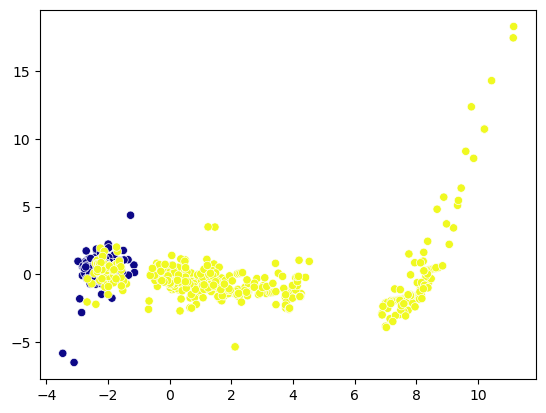

In [60]:
sns.scatterplot(x=x_pca[:,0],y=x_pca[:,1],c=updated_cards['Class'],cmap='plasma')

In [61]:
from sklearn.model_selection import train_test_split

In [63]:
X = x_pca
Y = updated_cards['Class']

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
model = LogisticRegression()

In [67]:
model.fit(X_train,Y_train)

LogisticRegression()

In [68]:
predictions = model.predict(X_test)

In [69]:
from sklearn.metrics import classification_report

In [70]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90        99
           1       0.97      0.80      0.88        98

    accuracy                           0.89       197
   macro avg       0.90      0.89      0.89       197
weighted avg       0.90      0.89      0.89       197

